In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special as spe
from scipy.optimize import fsolve

In [3]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=np.sqrt(x+1)*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=np.sqrt(-x)*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


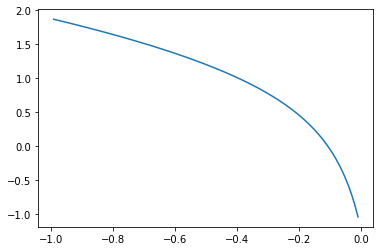

In [4]:
plt.figure()
x=np.arange(-1,0,0.01)
plt.plot(x, continuidad(x, 6, 10))

In [5]:
def bisection(a,b,f,l, rho,toi=1E-6):
    xl=a
    xr=b
    while(np.abs(xl-xr)>=toi):
        c=(xl+xr)/2.0
        prod=f(xl, l,rho)*f(c, l, rho)
        if prod>toi:
            xl=c
        else:
            if prod<toi:
                xr=c
    return c            

In [6]:
bisection(-0.999,0, continuidad, 6, 10)

-0.10804518985748292

In [7]:
rho=np.arange(10,100,10)
l=np.arange(0,11,1)
energias=np.zeros((len(rho), len(l)))

In [8]:
for i in range(len(rho)):
    for j in range(len(l)):
        energias[i][j]=bisection(-0.99999,0, continuidad, l[j], rho[i])
energias

array([[-2.90523485e-01, -5.15824882e-01, -3.34834565e-01,
        -1.38303327e-01, -9.53664780e-07, -2.89913139e-01,
        -1.08030193e-01, -9.53664780e-07, -9.53664780e-07,
        -9.53664780e-07, -9.53664780e-07],
       [-2.11788921e-01, -8.75531024e-02, -9.53664780e-07,
        -1.06565363e-01, -2.53841723e-01, -1.43369195e-01,
        -7.50067840e-01, -2.01409233e-01, -9.45720752e-02,
        -2.86312101e-01, -1.89450277e-01],
       [-6.32065174e-01, -2.69466566e-01, -7.50281460e-01,
        -2.79354163e-01, -7.65242553e-01, -2.97511940e-01,
        -3.85728793e-02, -1.45810576e-01, -2.53895128e-01,
        -5.24613856e-01, -2.95284179e-01],
       [-1.65234821e-01, -9.78679407e-02, -1.68576462e-01,
        -1.03269498e-01, -1.76419401e-01, -1.13126577e-01,
        -4.91928903e-02, -5.06570519e-01, -6.54738554e-02,
        -2.84297961e-01, -8.69580156e-02],
       [-2.62172938e-01, -5.01115556e-01, -2.64400699e-01,
        -5.04907327e-01, -2.69619153e-01, -5.11796602e-01,
  

In [9]:
energias[1]

array([-2.11788921e-01, -8.75531024e-02, -9.53664780e-07, -1.06565363e-01,
       -2.53841723e-01, -1.43369195e-01, -7.50067840e-01, -2.01409233e-01,
       -9.45720752e-02, -2.86312101e-01, -1.89450277e-01])

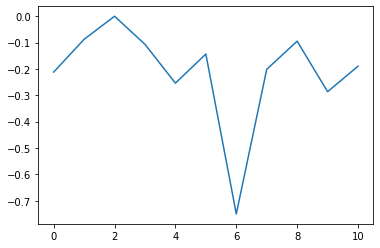

In [10]:
plt.plot(l, energias[1])

In [11]:
energias[:,1]

array([-0.51582488, -0.0875531 , -0.26946657, -0.09786794, -0.50111556,
       -0.10204881, -0.33352232, -0.03205744, -0.50059486])

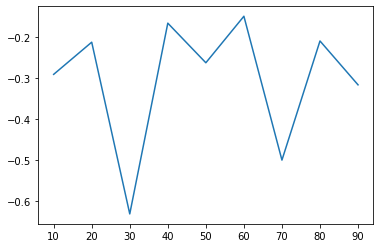

In [12]:
plt.plot(rho, energias[:,0])

In [13]:
def aproximada(x, l, rho):
    y=np.tan(rho*np.sqrt(1+x)-np.pi*l/2.0)+np.sqrt(1+x/(-x))
    return y

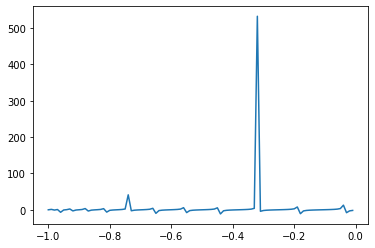

In [14]:
plt.figure()
plt.plot(x, aproximada(x,6,40))

In [16]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,z)
    f=-g/h
    return f
    

In [18]:
def sigma(x, l, rho,R):
    d=tanDl(x,l,rho)
    sigma=4*np.pi*(2*l+1)*d**2*R**2/((rho**2*x)*(1-d**2))
    return sigma

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


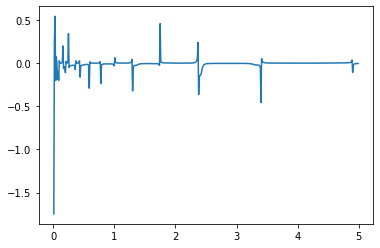

In [28]:
x=np.arange(0,5,0.01)
plt.figure()
plt.plot(x, sigma(x,0,40,1))

In [21]:
tanDl(x,0,10)

array([1.56635441])

In [22]:
x

array([0.9999])